# Análisis exploratorio de datos
El análisis exploratorio de datos se conoce como EDA (exploratory data analysis).


## Objetivos
1. Presentar las principales librerías de Python para análisis exploratorio de datos y recursos visuales.
2. Introducir y familiarizarse con la lectura y la exploración de datasets, permitiendo identificar límites y potencial de los datos así como su adecuación para el análisis.

## Datasets
Datos abiertos del GCBA. Ministerio de Salud. Instituto de Trasplantes de la Ciudad de Buenos Aires. Los descargamos de [aquí]('https://data.buenosaires.gob.ar/dataset/manifestaciones-a-la-donacion-para-trasplantes').

**Manifestaciones a la donación para trasplantes**
Información correspondiente a la Campaña de Promoción “Hoy también elegís ser donante de órganos” organizada por el Instituto de Trasplante de la Ciudad de Buenos Aires en el marco de la jornada electoral **PASO 2017** dando cumplimiento a la Ley 2508/07. Se realizó en 62 establecimientos autorizados por la Justicia Electoral de la Ciudad de Buenos Aires.

1. *Manifestaciones a la donación para trasplantes*: personas que decidieron sobre la donación de órganos y tejidos en la CABA durante las Elecciones PASO 2017.

2. *Establecimentos - Elecciones 2017*: ubicación de los establecimientos autorizados para las Elecciones Legislativas de Octubre 2017.



In [1]:
#importamos las librerias con las que trabajaremos
import numpy as np
from scipy import stats

import pandas as pd
import seaborn as sns

### Personas que se expresaron frente a la donación de órganos

In [ ]:
# este bloque es exclusivo para trabajar con colab
# se habilita un botón que tenés que pulsar para seleccionar tu archivo de un directorio local
from google.colab import files
files.upload()

In [2]:
# cargamos el dataset, instanciándolo para poder referenciarlo luego
data = pd.read_csv('manifestaciones-a-la-donacion-para-trasplantes.csv', sep=';')

# visualizamos que se haya cargado bien
data.head()

,NACIONALIDAD,SEXO,EDAD,CONSENTIMIENTO,CUALQUIER_ORGANO,CUALES_NO,TRASPLANTE,INVESTIGACION,COMUNA
0,ARGENTINA,F,40,SI,SI,NaN,SI,SI,2
1,ARGENTINA,M,31,SI,SI,NaN,SI,NO,2
2,ARGENTINA,F,41,SI,SI,NaN,SI,SI,2
3,ARGENTINA,M,29,SI,SI,NaN,SI,NO,2
4,ARGENTINA,F,26,SI,SI,NaN,SI,NO,2


In [3]:
# chequamos dimensiones, estructura, contenido
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 9 columns):
NACIONALIDAD        1502 non-null object
SEXO                1502 non-null object
EDAD                1502 non-null int64
CONSENTIMIENTO      1502 non-null object
CUALQUIER_ORGANO    1502 non-null object
CUALES_NO           14 non-null object
TRASPLANTE          1502 non-null object
INVESTIGACION       1502 non-null object
COMUNA              1502 non-null int64
dtypes: int64(2), object(7)
memory usage: 105.7+ KB


Según `.info()`:
* ¿Cómo identificarías si hay datos vacíos?
* ¿Podés decir que el dataset está bien organizado? ¿Por qué?
* ¿Eliminarías alguna fila o alguna columna?
* ¿Transformarías algún dato? 
* ¿Ya podrías analizarlo?
* Observando el dataset (su estructura, el nombre de las columnas, características de las respuestas, etc.), ¿cómo lo caracterizarías? ¿qué tipo de preguntas podrías responder?

In [4]:
# qué hace .describe()? 
# qué tipos de datos lee?
data.describe()

,EDAD,COMUNA
count,1502.000000,1502.000000
mean,42.914780,8.032623
std,15.259494,4.407416
min,18.000000,1.000000
25%,30.000000,4.000000
50%,41.000000,8.000000
75%,54.000000,12.000000
max,99.000000,15.000000


#### Exploremos la información troncal del dataset

In [5]:
# esta expresión genera un booleano sobre la serie/variable/columna que le pasamos
data['CONSENTIMIENTO']=='SI'

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1472    True
1473    True
1474    True
1475    True
1476    True
1477    True
1478    True
1479    True
1480    True
1481    True
1482    True
1483    True
1484    True
1485    True
1486    True
1487    True
1488    True
1489    True
1490    True
1491    True
1492    True
1493    True
1494    True
1495    True
1496    True
1497    True
1498    True
1499    True
1500    True
1501    True
Name: CONSENTIMIENTO, Length: 1502, dtype: bool

In [6]:
# empleamos la condición de arriba para seleccionar aquellos casos/registros/filas que cumplan con esa condición
# aquí hacemos la selección sobre la misma columna
# alternativamente se podría utilizar otra columna o el dataset completo, depende de lo que busquemos identificar!
data['CONSENTIMIENTO'][data['CONSENTIMIENTO']=='SI']

0       SI
1       SI
2       SI
3       SI
4       SI
5       SI
6       SI
7       SI
8       SI
9       SI
10      SI
11      SI
12      SI
13      SI
14      SI
15      SI
16      SI
17      SI
18      SI
19      SI
20      SI
21      SI
22      SI
23      SI
24      SI
25      SI
26      SI
27      SI
28      SI
29      SI
        ..
1472    SI
1473    SI
1474    SI
1475    SI
1476    SI
1477    SI
1478    SI
1479    SI
1480    SI
1481    SI
1482    SI
1483    SI
1484    SI
1485    SI
1486    SI
1487    SI
1488    SI
1489    SI
1490    SI
1491    SI
1492    SI
1493    SI
1494    SI
1495    SI
1496    SI
1497    SI
1498    SI
1499    SI
1500    SI
1501    SI
Name: CONSENTIMIENTO, Length: 1486, dtype: object

In [7]:
# sobre la línea de arriba, .count() permite contrar la cantidad de filas que cumple esa condición
data['CONSENTIMIENTO'][data['CONSENTIMIENTO']=='SI'].count()

1486

In [8]:
# aquí utilizamos esa construcción para contar respuestas afirmativas y negativas, guardando el resultado en memoria
donan = data['CONSENTIMIENTO'][data['CONSENTIMIENTO']=='SI'].count()
no_donan = data['CONSENTIMIENTO'][data['CONSENTIMIENTO']!='SI'].count()

# con ello, realizamos una operación que resuma la información
print('porcentaje de donantes: ', round(donan/len(data)*100,2))

porcentaje de donantes:  98.93


In [9]:
data['CUALQUIER_ORGANO'][data['CUALQUIER_ORGANO']!='SI'].count()

30

In [10]:
# .notnull() también opera como un booleano
# con la misma lógica que antes, podemos seleccionar aquellas filas cuya respuesta presenta alguna especificación
data['CUALES_NO'][data['CUALES_NO'].notnull()]

59             HIGADO-CORNEAS
233      RIÑON-HIGADO-CORNEAS
234              HIGADO-RIÑON
326                      OJOS
432                   CORNEAS
433       CORNEAS-PIEL-HUESOS
528                   CORNEAS
529       CORNEAS-PIEL-HUESOS
648       HIGADO-RIÑON-PULMON
883     RIÑON-CORNEAS-CORAZON
914               PIEL-HUESOS
1002                  TEJIDOS
1013                     PIEL
1434                  CORNEAS
Name: CUALES_NO, dtype: object

In [11]:
# vemos que hay 16 personas que no dieron consentimiento para donación
# también hay 16 que no aceptaron donar para trasplante
# serán los mismos? qué podés decir a partir de este output?
data['TRASPLANTE'][data['TRASPLANTE']!='SI'] == data['CONSENTIMIENTO'][data['CONSENTIMIENTO']!='SI']

82      True
83      True
96      True
119     True
120     True
121     True
122     True
132     True
133     True
167     True
556     True
1371    True
1381    True
1382    True
1383    True
1388    True
dtype: bool

In [12]:
data['INVESTIGACION'][data['INVESTIGACION']!='SI'].count()

909

#### Retomemos la exploración de las variables numéricas
Con funciones propias de la estadística descriptiva, obtendremos información acerca de las características de los encuestados

In [13]:
data['EDAD'].quantile([.05, .95])

0.05    21.0
0.95    69.0
Name: EDAD, dtype: float64

In [14]:
# la moda proviene del módulo stats de SciPy
stats.mode(data['EDAD'])

ModeResult(mode=array([29], dtype=int64), count=array([47]))

In [15]:
print('casos: ', len(data))
print('promedio: ', round(data['EDAD'].mean(),2))
print('mediana: ', round(data['EDAD'].median(),2))
print('moda: ', stats.mode(data['EDAD'])[0][0]) # SciPy & índices/subíndices
print('desvío estándar: ', round(data['EDAD'].std(),2))


casos:  1502
promedio:  42.91
mediana:  41.0
moda:  29
desvío estándar:  15.26


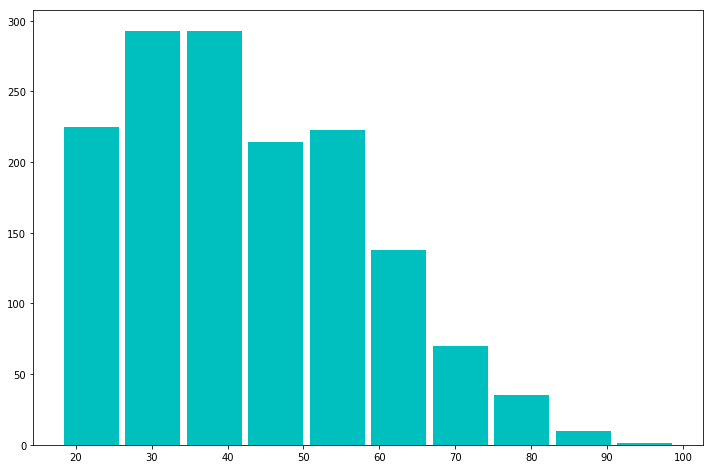

In [16]:
# aquí graficamos la forma que cobra la frecuencia de la variable EDAD
# utilizamos un método propio de PANDAS para plotear histogramas
data['EDAD'].hist(bins=10, grid=False, figsize=(12,8), color='c', rwidth=0.9);

# una vez que ejecutes la celda, si querés, quitá el # de las dos líneas siguientes
# seguramente cambie de formato el fondo del gráfico, debido a que antepuse un estilo preseteado de otra librería, SEABORN
#sns.set(style='whitegrid', font_scale=1.5)
#data['EDAD'].hist(bins=10, grid=False, figsize=(12,8), color='c', rwidth=0.9);

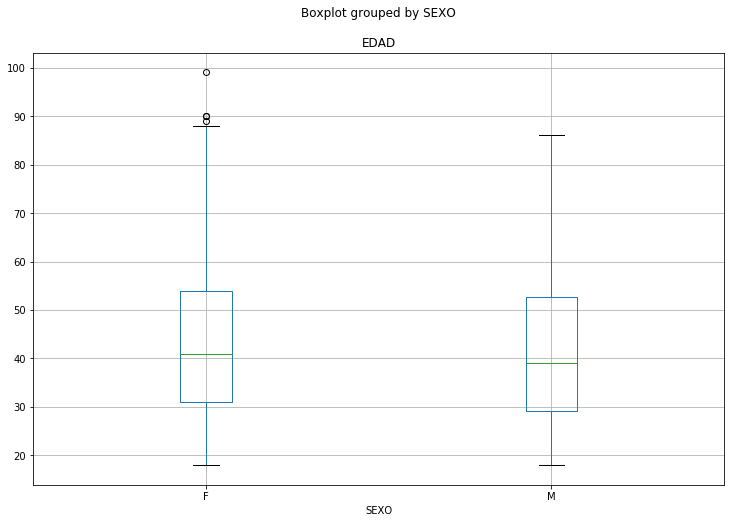

In [17]:
# sabés cómo interpretar un boxplot o diagrama de caja?
# data.boxplot(by='SEXO', figsize=(12,8), layout=(1,2));
data.boxplot('EDAD', by='SEXO', figsize=(12,8));

In [18]:
data['NACIONALIDAD'].unique()

array(['ARGENTINA', 'CHILENA', 'PERUANA', 'URUGUAYA', 'ESPAÑOLA',
       'PARAGUAYA', 'BOLIVIANA', 'CANADIENSE', 'BRASILERA', 'VENEZOLANA',
       'ITALIANA', 'MEXICANA', 'COLOMBIANA', 'FINLANDESA'], dtype=object)

In [19]:
data['NACIONALIDAD'].value_counts()

ARGENTINA     1448
PARAGUAYA       16
URUGUAYA        13
BRASILERA        5
BOLIVIANA        3
PERUANA          3
CHILENA          3
MEXICANA         2
ESPAÑOLA         2
VENEZOLANA       2
ITALIANA         2
FINLANDESA       1
COLOMBIANA       1
CANADIENSE       1
Name: NACIONALIDAD, dtype: int64

In [20]:
# veamos qué particularidades tienen quienes no serán donantes
#data.loc[data['CONSENTIMIENTO']!='SI',:]
data.loc[data['CONSENTIMIENTO']!='SI',['NACIONALIDAD', 'SEXO', 'EDAD', 'COMUNA']]

,NACIONALIDAD,SEXO,EDAD,COMUNA
82,ARGENTINA,F,24,8
83,ARGENTINA,F,37,4
96,ARGENTINA,F,36,1
119,ARGENTINA,M,18,4
120,PERUANA,F,38,4
121,ARGENTINA,M,37,4
122,ARGENTINA,F,34,4
132,ARGENTINA,M,51,6
133,ARGENTINA,F,82,6
167,ARGENTINA,M,46,4


In [21]:
# podemos sintetizar la información a partir de un groupby
data.loc[data['CONSENTIMIENTO']!='SI',['NACIONALIDAD', 'SEXO', 'EDAD', 'COMUNA']].groupby(['NACIONALIDAD','SEXO']).count()

EDAD  COMUNA
NACIONALIDAD SEXO              
ARGENTINA    F        9       9
             M        6       6
PERUANA      F        1       1

In [ ]:
# cómo trabajarías con quienes sí dieron consentimiento?
# escribí el código acá abajo!


Una opción para abordar el dataset, es reemplazar los números de las comunas por la referencia a alguno de sus barrios. De hecho, es más sencillo para reconocer si hay alguna asociación con los grupos etarios, el género declarado, la nacionalidad y el consentimiento para la donación. Tenemos un dataset complementario que, al menos en principio, podría facilitarnos ese matching entre el número de la comuna y el barrio. Veamos cómo pueden dialogar en este caso.

### Establecimientos

In [ ]:
# subimos el archivo
from google.colab import files
files.upload()

In [22]:
comunas = pd.read_csv('establecimentos-elecciones-2017.csv', sep=';', encoding='utf8')

In [ ]:
# cómo haces para ver si el df fue bien cargado?
# escribí el código acá abajo!


In [ ]:
# chequeá la estructura del dataframe (usualmente referido como df): dimensiones, tipos, nulos, etc.
# escribí el código acá abajo!


Una vez que pudiste acceder a las columnas:

* ¿Qué información nos puede servir para complementar el primer dataset? 
* ¿Se pueden integrar facilmente los dos datasets? ¿Tienen las mismas dimensiones? ¿Cómo se podrían vincular?


In [23]:
# vamos a parsear los datos de la comuna
# para poder generar una equivalencia entre las columnas 'COMUNA' de un df y otro, tenemos que adaptarlas
# por lo tanto, quitamos la palabra 'COMUNA' de cada celda, preservando el número
comunas['COMUNA'] = comunas['COMUNA'].apply(lambda x: x.replace('COMUNA','')).astype(int)

In [24]:
# acá tenemos a las columnas candidatas para el parseo
# está todo bien en los datos?
comunas[['BARRIO','COMUNA']]

,BARRIO,COMUNA
0,RECOLETA,2
1,RECOLETA,2
2,BOEDO,5
3,ALMAGRO,5
4,VILLA LURO,10
5,VILLA DEVOTO,11
6,COGHLAN,12
7,COLEGIALES,13
8,PALERMO,14
9,RECOLETA,2


In [25]:
# vamos a llevar ese subset a un diccionario para que las KEYS sean para el matching con el df DATA y los VALUE operen como etiquetas
ref = { k:v for v,k in zip(comunas['BARRIO'],comunas['COMUNA'])}
ref

{2: 'RECOLETA',
 5: 'ALMAGRO',
 10: 'VILLA LURO',
 11: 'VILLA DEVOTO',
 12: 'COGHLAN',
 13: 'COLEGIALES',
 14: 'PALERMO'}

¿La información está completa? ¿Perdimos algo en el camino?

In [26]:
# notaste que había 2 establecimientos en la comuna 5, uno en Almagro y otro en Boedo
# como en nuestro df DATA no podemos diferenciarlos, incluimos ambos a la referencia y la actualizamos
ref.update({5 : 'ALMAGRO/BOEDO'})

In [27]:
ref

{2: 'RECOLETA',
 5: 'ALMAGRO/BOEDO',
 10: 'VILLA LURO',
 11: 'VILLA DEVOTO',
 12: 'COGHLAN',
 13: 'COLEGIALES',
 14: 'PALERMO'}

In [28]:
# cuando al .map() le pasamos un diccionario cuyas claves generan equivalencias con los valores de cqada registro...
# es posible etiquetar o renombrar el contenido de cada celda 
data['COMUNA'].map(ref)[-15:]

1487    COLEGIALES
1488    COLEGIALES
1489    COLEGIALES
1490       PALERMO
1491       PALERMO
1492       PALERMO
1493       PALERMO
1494       PALERMO
1495       PALERMO
1496       PALERMO
1497    VILLA LURO
1498    VILLA LURO
1499    VILLA LURO
1500    VILLA LURO
1501    VILLA LURO
Name: COMUNA, dtype: object

In [29]:
# aquí guardamos ese reetiquetado en una nueva columna para no perder información
data['COMUNA2'] = data['COMUNA'].map(ref)

In [30]:
data.columns

Index(['NACIONALIDAD', 'SEXO', 'EDAD', 'CONSENTIMIENTO', 'CUALQUIER_ORGANO',
       'CUALES_NO', 'TRASPLANTE', 'INVESTIGACION', 'COMUNA', 'COMUNA2'],
      dtype='object')

In [31]:
x = data.groupby(['CONSENTIMIENTO','SEXO']).count()
x

NACIONALIDAD  EDAD  CUALQUIER_ORGANO  CUALES_NO  \
CONSENTIMIENTO SEXO                                                    
NO             F               10    10                10          0   
               M                6     6                 6          0   
SI             F             1062  1062              1062          8   
               M              424   424               424          6   

                     TRASPLANTE  INVESTIGACION  COMUNA  COMUNA2  
CONSENTIMIENTO SEXO                                              
NO             F             10             10      10        1  
               M              6              6       6        0  
SI             F           1062           1062    1062      455  
               M            424            424     424      180

In [32]:
categoricas = ['SEXO', 'CONSENTIMIENTO', 'INVESTIGACION']

# excluyo 
# NACIONALIDAD y COMUNA (quiero conservar sus etiquetas)
# EDAD (ya numérica)
# CUALES_NO (14 casos, detalle arriba)
# CUALQUIER_ORGANO_SI (30 con NO)
# TRASPLANTE (es redundante)

for i in categoricas:
    print(data[i].unique())

['F' 'M']
['SI' 'NO']
['SI' 'NO']


In [33]:
# generamos un df de variables dummies (datos numéricos binarios [0, 1]) para facilitar algunos procedimientos 
dummies = pd.get_dummies(data[categoricas])

In [34]:
# armamos selecciones de las columnas que nos interesa conservar en un nuevo df, ya integrado
data_seleccion = ['NACIONALIDAD', 'EDAD', 'COMUNA', 'COMUNA2']
dummies_seleccion = ['SEXO_F', 'CONSENTIMIENTO_SI', 'INVESTIGACION_SI']

#construimos el nuevo df, con partes de cada uno de los df existentes
newdata = data[data_seleccion].join(dummies[dummies_seleccion])
newdata.head()

,NACIONALIDAD,EDAD,COMUNA,COMUNA2,SEXO_F,CONSENTIMIENTO_SI,INVESTIGACION_SI
0,ARGENTINA,40,2,RECOLETA,1,1,1
1,ARGENTINA,31,2,RECOLETA,0,1,0
2,ARGENTINA,41,2,RECOLETA,1,1,1
3,ARGENTINA,29,2,RECOLETA,0,1,0
4,ARGENTINA,26,2,RECOLETA,1,1,0


In [35]:
# chequeamos estructura de los datos por comuna
newdata['COMUNA2'].value_counts(normalize=True, sort=True, ascending=False, dropna=False)*100

NaN              57.656458
ALMAGRO/BOEDO     8.455393
COLEGIALES        7.856192
RECOLETA          6.058589
COGHLAN           5.858855
PALERMO           5.659121
VILLA DEVOTO      4.860186
VILLA LURO        3.595206
Name: COMUNA2, dtype: float64

Habían notado que prácticamente la mitad de las comunas no estaba categorizada o carecía de establecimiento de referencia? 

De hecho, más de la mitad de la información al respecto no ha sido disponibilizada! 


### Desafío
Una alternativa para resulver este tema es armar un diccionario propio para el parseo, completo. Podés recurrir al GCBA o a Wikipedia para armar una lista completa de las referencias por comuna { número : barrios afectados } y reescribir la columna 'COMUNA 2'. 

In [ ]:
# cómo comenzarías?
# escribí el código acá abajo!


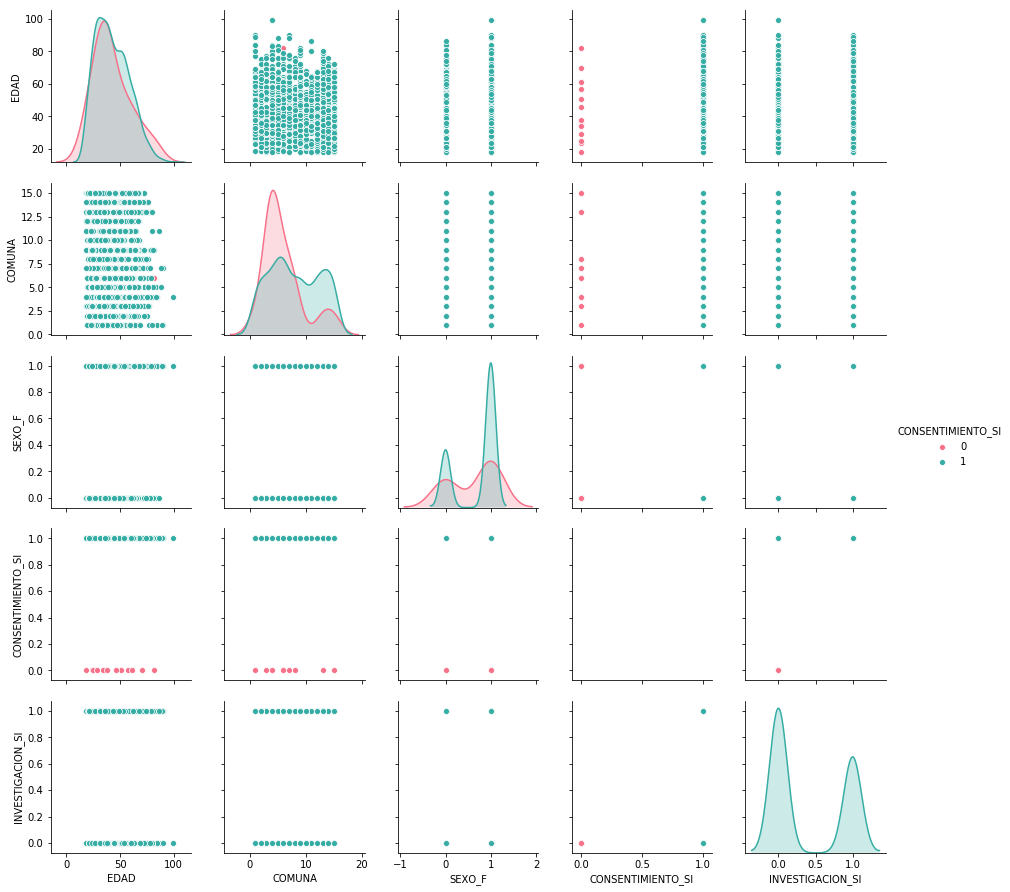

In [37]:
# hay una serie de gráficos que puede ser útil para identificar algunos agrupamientos y/o tendencias
sns.pairplot(data=newdata, hue='CONSENTIMIENTO_SI', palette='husl');

En este caso, es difícil por la conglomeración de dummies. De hechom muchos puntos se apilan en el mismo par ordenado. De ahí que nos conviene graficar las series con histograms o swarmplots. 

[Aquí](https://seaborn.pydata.org/generated/seaborn.pairplot.html) también podés ver algunos ejemplos de datos más funcionales para el pairplot.

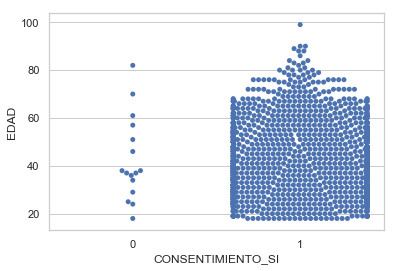

In [38]:
sns.set(style='whitegrid', font_scale=1)
sns.swarmplot(y='EDAD', x='CONSENTIMIENTO_SI', data=newdata, color='b');

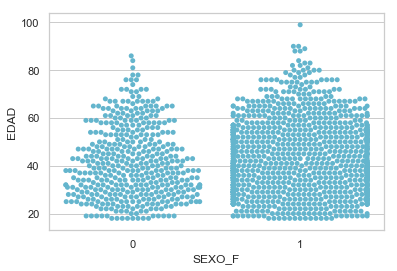

In [39]:
sns.swarmplot(y='EDAD', x='SEXO_F', data=newdata, color='c');